# Plotting and Visualization

Making plots and static or interactive visualizations is one of the most important tasks
in data analysis. It may be a part of the exploratory process; for example, helping identify
outliers, needed data transformations, or coming up with ideas for models. For
others, building an interactive visualization for the web using a toolkit like d3.js (http:
//d3js.org/) may be the end goal. Python has many visualization tools (see the end of
this chapter), but I’ll be mainly focused on matplotlib (http://matplotlib.sourceforge
.net).

matplotlib is a (primarily 2D) desktop plotting package designed for creating publication-
quality plots. The project was started by John Hunter in 2002 to enable a MATLAB-
like plotting interface in Python. He, Fernando Pérez (of IPython), and others have
collaborated for many years since then to make IPython combined with matplotlib a
very functional and productive environment for scientific computing. When used in
tandem with a GUI toolkit (for example, within IPython), matplotlib has interactive
features like zooming and panning. It supports many different GUI backends on all
operating systems and additionally can export graphics to all of the common vector
and raster graphics formats: PDF, SVG, JPG, PNG, BMP, GIF, etc. I have used it to
produce almost all of the graphics outside of diagrams in this book.

matplotlib has a number of add-on toolkits, such as mplot3d for 3D plots and basemap
for mapping and projections. I will give an example using basemap to plot data on a map
and to read shapefiles at the end of the chapter.

To follow along with the code examples in the chapter, make sure you have started
IPython in Pylab mode (ipython --pylab) or enabled GUI event loop integration with
the %gui magic.

In [1]:
%matplotlib inline

In [2]:
from pandas import DataFrame, Series

import pandas as pd
import sys

import numpy as np

import matplotlib.pyplot as plt

## A Brief matplotlib API Primer

There are several ways to interact with matplotlib. The most common is through pylab
mode in IPython by running ipython --pylab. This launches IPython configured to be
able to support the matplotlib GUI backend of your choice (Tk, wxPython, PyQt, Mac OS X native, GTK). For most users, the default backend will be sufficient. Pylab mode
also imports a large set of modules and functions into IPython to provide a more MATLAB-
like interface. You can test that everything is working by making a simple plot:

plot(np.arange(10))

If everything is set up right, a new window should pop up with a line plot. You can
close it by using the mouse or entering close(). Matplotlib API functions like plot and
close are all in the matplotlib.pyplot module, which is typically imported by convention
as:

import matplotlib.pyplot as plt

While the pandas plotting functions described later deal with many of the mundane
details of making plots, should you wish to customize them beyond the

NOTE: There is not enough room in the book to give a comprehensive treatment
to the breadth and depth of functionality in matplotlib. It should be
enough to teach you the ropes to get up and running. The matplotlib
gallery and documentation are the best resource for becoming a plotting
guru and using advanced features.

### Figures and Subplots

Plots in matplotlib reside within a Figure object. You can create a new figure with
plt.figure:

In [3]:
fig = plt.figure()

In [4]:
fig

If you are in pylab mode in IPython, a new empty window should pop up. plt.fig
ure has a number of options, notably figsize will guarantee the figure has a certain size
and aspect ratio if saved to disk. Figures in matplotlib also support a numbering scheme
(for example, plt.figure(2)) that mimics MATLAB. You can get a reference to the
active figure using plt.gcf().
You can’t make a plot with a blank figure. You have to create one or more subplots
using add_subplot:

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

In [6]:
ax1

This means that the figure should be 2 × 2, and we’re selecting the first of 4 subplots
(numbered from 1). If you create the next two subplots, you’ll end up with a figure that
looks like Figure 8-2.

In [7]:
ax2 = fig.add_subplot(2, 2, 2)

In [8]:
ax3 = fig.add_subplot(2, 2, 3).plot

In [9]:

ax1

### 

In [10]:
ax3

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x11c54cf28>>

When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib
draws on the last figure and subplot used (creating one if necessary), thus hiding the
figure and subplot creation. Thus, if we run the following command, you’ll get something
like Figure 8-3:

In [11]:
from numpy.random import randn

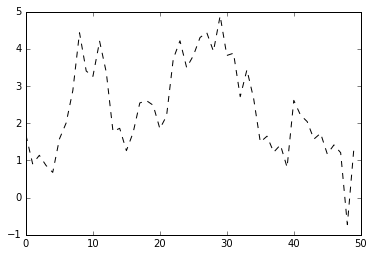

In [12]:
plt.plot(randn(50).cumsum(), 'k--')

The 'k--' is a style option instructing matplotlib to plot a black dashed line. The objects
returned by fig.add_subplot above are AxesSubplot objects, on which you can directly
plot on the other empty subplots by calling each one’s instance methods, see Figure 8-4:

In [13]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)

In [14]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

You can find a comprehensive catalogue of plot types in the matplotlib documentation.
Since creating a figure with multiple subplots according to a particular layout is such
a common task, there is a convenience method, plt.subplots, that creates a new figure
and returns a NumPy array containing the created subplot objects:

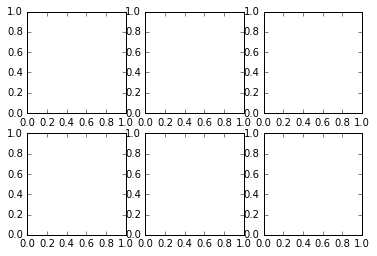

In [15]:
fig, axes = plt.subplots(2, 3)

In [16]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c6408d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c8de668>]], dtype=object)

This is very useful as the axes array can be easily indexed like a two-dimensional array;
for example, axes[0, 1]. You can also indicate that subplots should have the same X
or Y axis using sharex and sharey, respectively. This is especially useful when comparing
data on the same scale; otherwise, matplotlib auto-scales plot limits independently. See
Table 8-1 for more on this method.

Table 8-1. pyplot.subplots options

Argument Description

nrows Number of rows of subplots

ncols Number of columns of subplots

sharex All subplots should use the same X-axis ticks (adjusting the xlim will affect all subplots)

sharey All subplots should use the same Y-axis ticks (adjusting the ylim will affect all subplots)

subplot_kw Dict of keywords for creating the

**fig_kw Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2,

Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the
subplots and spacing between subplots. This spacing is all specified relative to the
height and width of the plot, so that if you resize the plot either programmatically or
manually using the GUI window, the plot will dynamically adjust itself. The spacing
can be most easily changed using the subplots_adjust Figure method, also available as
a top-level function:

subplots_adjust(left=None, bottom=None, right=None, top=None,
wspace=None, hspace=None)

wspace and hspace controls the percent of the figure width and figure height, respectively,
to use as spacing between subplots. Here is a small example where I shrink the
spacing all the way to zero (see Figure 8-5):

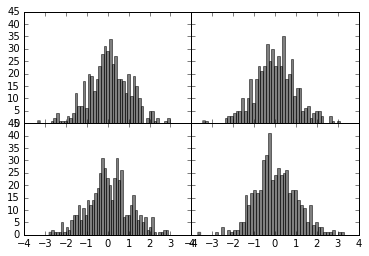

In [17]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

You may notice that the axis labels overlap. matplotlib doesn’t check whether the labels
overlap, so in a case like this you would need to fix the labels yourself by specifying
explicit tick locations and tick labels. More on this in the coming sections.

## Colors, Markers, and Line Styles

Matplotlib’s main plot function accepts arrays of X and Y coordinates and optionally
a string abbreviation indicating color and line style. For example, to plot x versus y with
green dashes, you would execute:

ax.plot(x, y, 'g--')

This way of specifying both color and linestyle in a string is provided as a convenience;
in practice if you were creating plots programmatically you might prefer not to have to
munge strings together to create plots with the desired style. The same plot could also
have been expressed more explicitly as:

ax.plot(x, y, linestyle='--', color='g')

There are a number of color abbreviations provided for commonly-used colors, but any
color on the spectrum can be used by specifying its RGB value (for example, '#CECE
CE'). You can see the full set of linestyles by looking at the docstring for plot.

Line plots can additionally have markers to highlight the actual data points. Since matplotlib
creates a continuous line plot, interpolating between points, it can occasionally
be unclear where the points lie. The marker can be part of the style string, which must
have color followed by marker type and line style (see Figure 8-6):

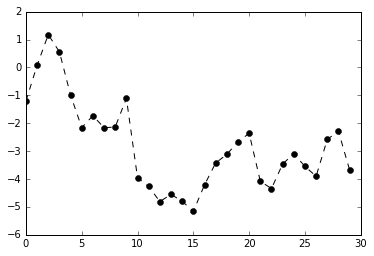

In [18]:
plt.plot(randn(30).cumsum(), 'ko--')

This could also have been written more explicitly as:

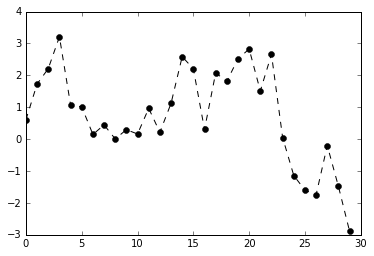

In [19]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

For line plots, you will notice that subsequent points are linearly interpolated by default.
This can be altered with the drawstyle option:

In [20]:
data = randn(30).cumsum()

In [21]:
data

array([ 0.81607678,  0.13716139, -0.02954817,  1.9555552 ,  2.09630028,
        1.19075179,  1.06084805,  0.65208027, -0.44281655,  0.85484218,
       -1.96446601, -1.811658  , -1.35408526, -2.16451137, -2.57444689,
       -2.37802439, -1.84517529, -3.32076408, -2.67751471, -2.86662684,
       -2.60784891, -0.70847717,  1.21191149,  1.87648143,  2.33135174,
        1.08517995,  0.2998341 , -0.26459111, -0.20842703,  0.02708557])

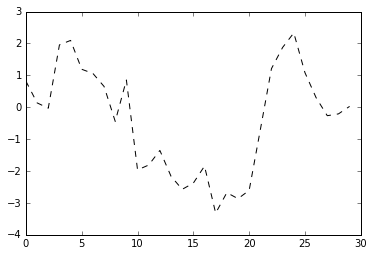

In [22]:
plt.plot(data, 'k--', label='Default')

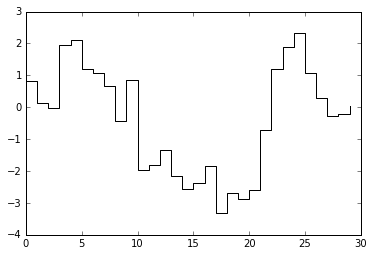

In [23]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

/Users/Kevin/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


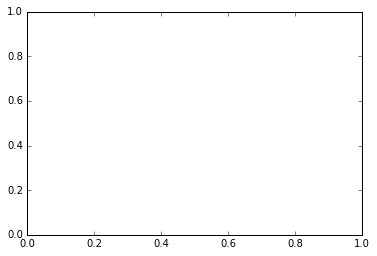

In [24]:
plt.legend(loc='best')

Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things: using the
procedural pyplot interface (which will be very familiar to MATLAB users) and the
more object-oriented native matplotlib API.

The pyplot interface, designed for interactive use, consists of methods like xlim,
xticks, and xticklabels. These control the plot range, tick locations, and tick labels,
respectively. They can be used in two ways:

- Called with no arguments returns the current parameter value. For example
plt.xlim() returns the current X axis plotting range

- Called with parameters sets the parameter value. So plt.xlim([0, 10]), sets the X
axis range to 0 to 10

All such methods act on the active or most recently-created AxesSubplot. Each of them
corresponds to two methods on the subplot object itself; in the case of xlim these are
ax.get_xlim and ax.set_xlim. I prefer to use the subplot instance methods myself in
the interest of being explicit (and especially when working with multiple subplots), but
you can certainly use whichever you find more convenient.

Setting the title, axis labels, ticks, and ticklabels

To illustrate customizing the axes, I’ll create a simple figure and plot of a random walk
(see Figure 8-8):

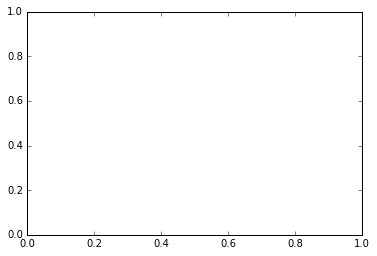

In [25]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [26]:
ax.plot(randn(1000).cumsum())

To change the X axis ticks, it’s easiest to use set_xticks and set_xticklabels. The
former instructs matplotlib where to place the ticks along the data range; by default
these locations will also be the labels. But we can set any other values as the labels using set_xticklabels:

In [27]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [28]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
        rotation=30, fontsize='small')

Lastly, set_xlabel gives a name to the X axis and set_title the subplot title:

In [29]:
ax.set_title('My first matplotlib plot')

In [31]:
ax.set_xlabel('Stages')

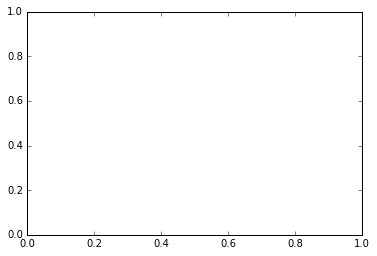

In [32]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [33]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [34]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [35]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

Once you’ve done this, you can either call ax.legend() or plt.legend() to automatically
create a legend:

In [36]:
ax.legend(loc='best')